In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os
os.listdir('../Landsat8/')

['LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif']

In [3]:
#import bands as separate 1 band raster
band4 = rasterio.open('../Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') #red
band5 = rasterio.open('../Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') #nir

In [4]:
#number of raster rows
band4.height

1338

In [5]:
#number of raster columns
band4.width

2107

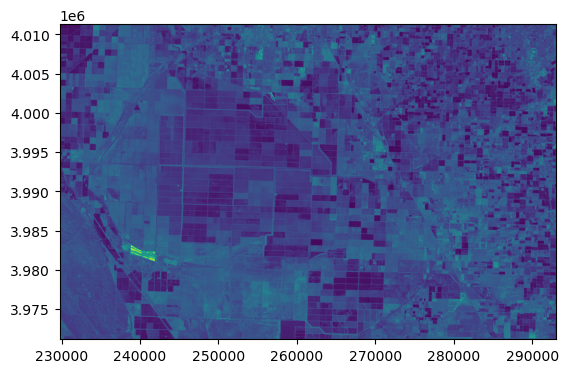

<Axes: >

In [6]:
#plot band 
plot.show(band4)

In [7]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [8]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32611)

In [9]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [ ]:
#raster values as matrix array
band4.read(1)

In [ ]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [ ]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

In [ ]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

In [ ]:
#export ndvi image
ndviImage = rasterio.open('../Output/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

In [ ]:
#plot ndvi
ndvi = rasterio.open('../Output/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)